In [1]:
import sys

import matplotlib.pyplot as plt
import json

import dysts
from dysts.flows import *
from dysts.base import *
from dysts.utils import *
from dysts.analysis import *

try:
    from degas import *
except:
    pass


%load_ext autoreload
%autoreload 2

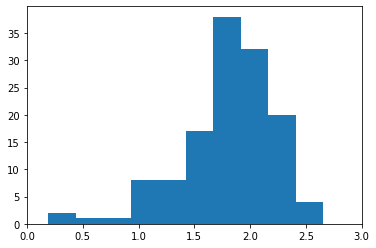

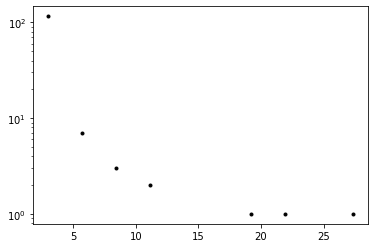

In [25]:
data_path = dysts.data_path

with open(data_path, "r") as file:
    data = json.load(file)
print(f"Total models being analyzed is {len(data.keys())}.")


all_lyapunov = list()
all_correlation_dimensions = list()
all_kaplan_yorke_dimensions = list()
all_dynamical_dimensions = list()
for item in data:
    all_lyapunov.append(data[item]["maximum_lyapunov_estimated"] * data[item]["period"])
    all_correlation_dimensions.append(data[item]["correlation_dimension"])
    all_kaplan_yorke_dimensions.append(data[item]["kaplan_yorke_dimension"])
    all_dynamical_dimensions.append(len(data[item]["initial_conditions"]))

plt.figure()
plt.hist(all_correlation_dimensions)
plt.xlim([0, 3])

plt.figure()
histvals, bins = np.histogram(all_lyapunov)
plt.semilogy(3 + bins[:-1], histvals, '.k')

In [156]:
all_series.shape

(17, 150)

In [ ]:
[item for sublist in regular_list for item in sublist]

In [201]:
[item for item2 in [[1, 2], [3, 4]] for item in item2]

[1, 2, 3, 4]

In [209]:
df_rolled = roll_time_series(df, column_id="id", column_sort="time")

(131, 1000)

In [250]:
INPUT_PATH = "dysts/data/dataset_univariate__pts_per_period_100__periods_10.json"
with open(INPUT_PATH, "r") as file:
    data = json.load(file)
all_indices = np.array(list(data.keys()))
all_series = np.vstack([data[item]["time"] for item in data])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1000 and the array at index 56 has size 59328

In [253]:
for item in data:
    if len(data[item]["time"]) > 1000:
        print(item)

IkedaDelay
MackeyGlass
PiecewiseCircuit
ScrollDelay
SprottDelay
VossDelay


In [246]:
INPUT_PATH = "dysts/data/dataset_univariate__pts_per_period_100__periods_10.json"
with open(INPUT_PATH, "r") as file:
    data = json.load(file)


def ts_from_db(data):
    """
    data (dict): A dictionary with index given by top-level keys
    """
    all_indices = np.array(list(data.keys()))
    all_times = np.vstack([data[item]["time"] for item in data])
    all_values = np.vstack([data[item]["values"] for item in data])
    all_indices_extruded = np.arange(all_times.shape)[:, None] * np.ones(all_times.shape[1])[None, :]
    print(all_indices_extruded.shape, all_times.shape, all_values.shape)
    
ts_from_db(data)



ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1000 and the array at index 56 has size 59328

In [229]:
INPUT_PATH = "dysts/data/dataset_univariate__pts_per_period_100__periods_10.json"
with open(INPUT_PATH, "r") as file:
    data = json.load(file)
    
all_series = np.vstack([data[item]["values"] for item in data])

,id,time,value
0,0.0,0.0,-1.570985
1,0.0,1.0,-1.605106
2,0.0,2.0,-1.623725
3,0.0,3.0,-1.627288
4,0.0,4.0,-1.616189
...,...,...,...
895,130.0,895.0,-0.829918
896,130.0,896.0,-0.796895
897,130.0,897.0,-0.762724
898,130.0,898.0,-0.727682


Feature Extraction:   0%|          | 0/33 [00:02<?, ?it/s]


KeyboardInterrupt: 

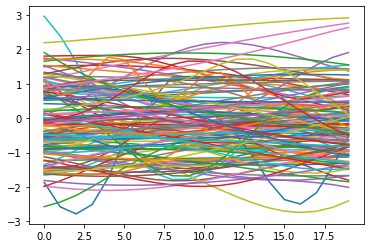

In [248]:


import pandas as pd
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute





INPUT_PATH = "dysts/data/dataset_univariate__pts_per_period_100__periods_10.json"
with open(INPUT_PATH, "r") as file:
    data = json.load(file)
    
all_series = np.vstack([data[item]["values"] for item in data])

all_series -= np.mean(all_series, axis=1, keepdims=True)
all_series /= np.std(all_series, axis=1, keepdims=True)

all_series = all_series[:, 2:902]


plt.plot(all_series.T[:20]);








all_df = list()
for i in range(len(all_series)):
    series_arr = all_series[i]
    series_pd = pd.DataFrame(np.vstack([i * np.ones(len(series_arr)), np.arange(len(series_arr)), series_arr]).T, columns=["id", "time", "value"])
    all_df.append(series_pd)
    
#     if i > 10:
#         break
    
all_datasets = pd.concat(
    all_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)    

extracted_features = extract_features(all_datasets, column_id="id", column_sort="time")
feat_arr = extracted_features.to_numpy()

filter_nans = ~np.isnan(np.mean(feat_arr, axis=0))

feat_names = np.array(list(extracted_features.columns))[filter_nans]
feat_arr = feat_arr[:, filter_nans]
feat_arr = (feat_arr - np.mean(feat_arr, axis=0))

filter_nonvarying = (np.std(feat_arr, axis=0) > 0)

feat_names = feat_names[filter_nonvarying]
feat_arr = feat_arr[:, filter_nonvarying]


## now pick top-k features with lowest variance among replicates or different timepoints

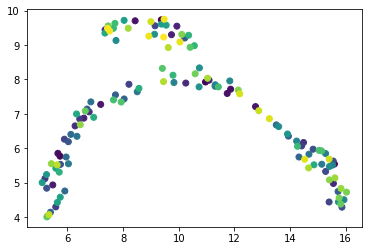

In [219]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.arange(len(embedding[:, 0])))

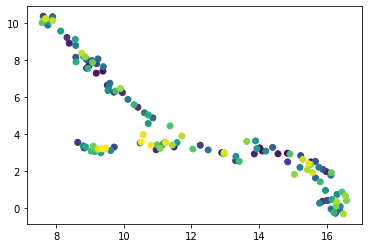

In [222]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.arange(len(embedding[:, 0])))

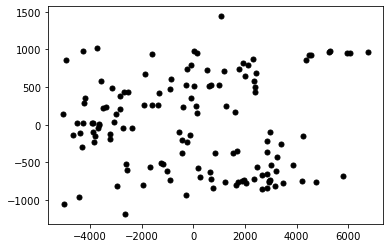

In [227]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap


# model =  PCA(n_components=2, random_state=0)
# model =  TSNE(n_components=2, perplexity=10, random_state=0)
model = umap.UMAP(random_state=0)
embedding = model.fit_transform(feat_arr)

plt.plot(embedding[:, 0], embedding[:, 1], '.k', markersize=10)

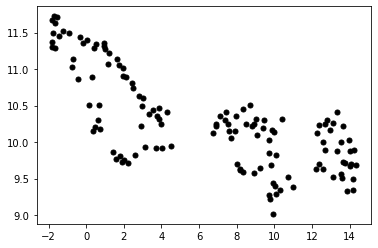

In [194]:
## generate new samples of all time series, then re-embed
## see which cluster distinctions persist across series.
## Can also create "sliding" windows from one long time series with tsfresh
## Filter out any features that fluctuate too rapidly. Only integral features are really useful
## The UMAP should vary barely and smoothly with window, not jump erratically

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap


# model =  PCA(n_components=2)
# model =  TSNE(n_components=2, perplexity=10, random_state=0)
model = umap.UMAP(random_state=0)
embedding = model.fit_transform(feat_arr)

plt.plot(embedding[:, 0], embedding[:, 1], '.k', markersize=10)

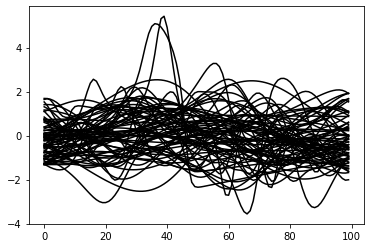

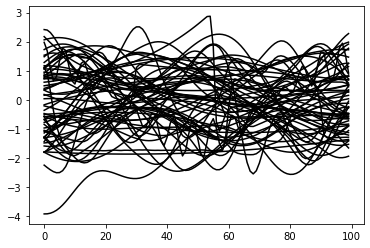

In [168]:
group1_bool = ((embedding[:, 0] + embedding[:, 1]) > 12)

plt.figure()
plt.plot(all_series[group1_bool][:, :100].T, 'k');

plt.figure()
plt.plot(all_series[~group1_bool][:, :100].T, 'k');

In [172]:
from scipy.stats import spearmanr

top_features = list()
for i, feats in enumerate(feat_arr.T):
    max_corr = max(
        np.abs(spearmanr(embedding[:, 0] + embedding[:, 1], feats).correlation),
        np.abs(spearmanr(embedding[:, 0] + embedding[:, 1], feats).correlation)
       )
    if max_corr > 0.5:
        top_features.append((i, feat_names[i], max_corr))
sort_inds = np.argsort([item[2] for item in top_features])[::-1].astype(int)
top_features = np.array(top_features)[sort_inds]
print(top_features[:10])

[['622' 'value__fft_aggregated__aggtype_"variance"' '0.9937917044787273']
 ['624' 'value__fft_aggregated__aggtype_"kurtosis"' '0.9430950728660652']
 ['623' 'value__fft_aggregated__aggtype_"skew"' '0.8482570864250254']
 ['621' 'value__fft_aggregated__aggtype_"centroid"' '0.8245662734212352']
 ['516' 'value__fft_coefficient__attr_"abs"__coeff_95'
  '0.5509528639299632']
 ['515' 'value__fft_coefficient__attr_"abs"__coeff_94'
  '0.5404953824801153']
 ['520' 'value__fft_coefficient__attr_"abs"__coeff_99'
  '0.5162120322425666']
 ['519' 'value__fft_coefficient__attr_"abs"__coeff_98'
  '0.5098596060428122']]


In [176]:
from nolds import dfa, hurst_rs, sampen, corr_dim

all_dfa = np.array([dfa(item) for item in all_series])
all_hurst = np.array([hurst_rs(item) for item in all_series])
all_sampen = np.array([sampen(item) for item in all_series])
# all_sampen = np.array([corr_dim(item, 5) for item in all_series])

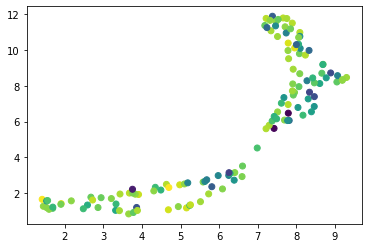

In [181]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=all_dfa)

<ipython-input-146-a55336a2a0fc>:2: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(minmag))


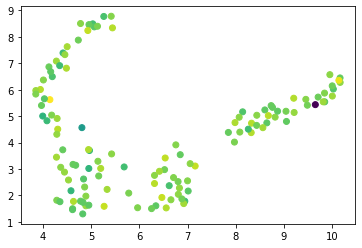

In [146]:

plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(minmag))

<ipython-input-15-f22f9d511368>:8: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(lyaps))


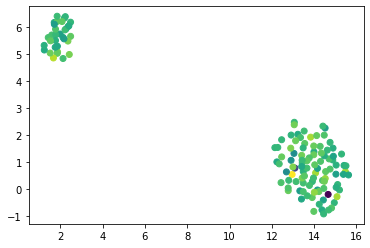

In [15]:
# names = np.array(list(data.keys()))
# lyaps = np.array([getattr(dysts.flows, item)().maximum_lyapunov_estimated for item in data])
# kydims = [getattr(dysts.flows, item)().kaplan_yorke_dimension for item in data]
# cdims = [getattr(dysts.flows, item)().correlation_dimension for item in data]
# minmag = [np.min(np.abs(getattr(dysts.flows, item)().lyapunov_spectrum_estimated)) for item in data]
# dtvals = np.array([getattr(dysts.flows, item)().dt for item in data])
# periods = np.array([getattr(dysts.flows, item)().period for item in data])
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.log10(lyaps))

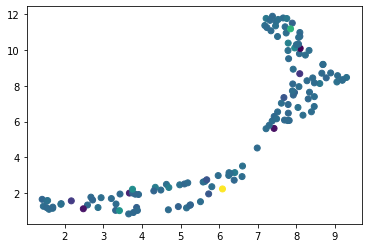

In [169]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=feat_arr[:, 7])

In [131]:
hurst_rs(all_series[0])

0.39927246177037

In [146]:
np.abs(spearmanr(embedding[:, 0], all_dfa).correlation)

0.30877595686755993

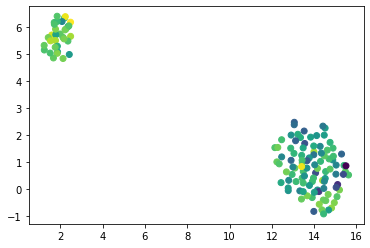

In [147]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=all_dfa)

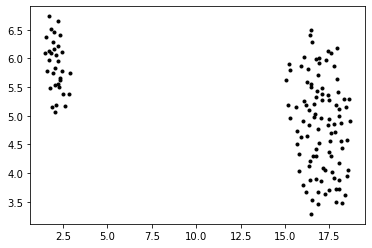

In [102]:

model = umap.UMAP()
embedding = model.fit_transform(feat_arr)

plt.plot(embedding[:, 0], embedding[:, 1], '.k')

In [46]:
series_pd

,id,time,value
0,11.0,0.0,0.607279
1,11.0,1.0,0.710913
2,11.0,2.0,0.884983
3,11.0,3.0,1.156696
4,11.0,4.0,1.535859
...,...,...,...
145,11.0,145.0,-1.124033
146,11.0,146.0,-0.724464
147,11.0,147.0,-0.440211
148,11.0,148.0,-0.278864
